In [61]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import os
import numpy as np
import pandas as pd


base_dir = "./disprot_plotdata"
seq_file   = base_dir + "/halft5/seq_data.txt"
annot_file = base_dir + "/halft5/annot_data.txt" 
embed_file = base_dir + "/halft5/embedding_data.txt.npz"

def loader(infile):
    lines = list()
    with open(infile) as infmt:
        for line in infmt:
            lines += line
    element_list = [e for e in lines]
    return element_list

seq_list   = loader(seq_file)
annot_list = loader(annot_file)

In [62]:
loaded_data = np.load(embed_file)

In [63]:
embeddings = loaded_data["concat_emb"]

In [64]:
print(len(seq_list), len(annot_list), embeddings.shape)

903246 903246 (903246, 1024)


In [39]:
import umap

In [40]:
my_umap = umap.UMAP(n_neighbors=30, min_dist=.25)
umap_embed = my_umap.fit_transform(embeddings)

In [56]:
umap_embed.shape

(3954, 2)

In [41]:
AAs = list(set(seq_list))

In [42]:
print(umap_embed.shape)
aa_means = dict()
for aa in AAs:
    AAix = [x for x in range(0, len(seq_list)) if seq_list[x] == aa]
    embed_aa = umap_embed[AAix,:]
    x_mean = np.mean(embed_aa[:,0])
    y_mean = np.mean(embed_aa[:,1])
    aa_means[aa] = (x_mean, y_mean)

(3954, 2)


In [50]:
def plot_UMAP(ax, umap_embedded, annot_list, colormap = 'gist_rainbow'):
    AAs = list(set(annot_list))
    cmap = cm.get_cmap(colormap, len(AAs))
    colordict = dict(zip(AAs, np.arange(0, len(AAs))))
    
    # for annotating with text
    aa_means = dict()
    for aa in AAs:
        AAix = [x for x in range(0, len(seq_list)) if seq_list[x] == aa]
        embed_aa = umap_embed[AAix,:]
        x_mean = np.mean(embed_aa[:,0])
        y_mean = np.mean(embed_aa[:,1])
        aa_means[aa] = (x_mean, y_mean)
    
    ax.scatter(umap_embedded[:,0], umap_embedded[:,1], s=2, alpha=0.3, 
               c=[cmap(colordict[x]) for x in annot_list])

    for aa in aa_means.keys():
        ax.text(aa_means[aa][0], aa_means[aa][1], aa, fontsize='large', fontweight='bold')

    legend_elements = [Patch(facecolor=cmap(colordict[x]), edgecolor=cmap(colordict[x]),label=x) for x in AAs]
    ax.legend(handles=legend_elements, loc='right')
    return

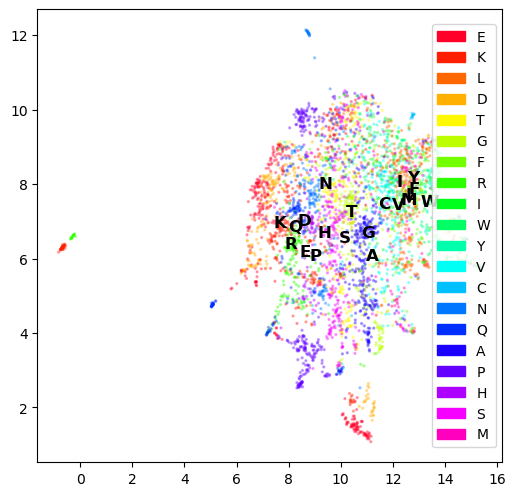

In [55]:

fig = plt.figure(figsize=(6,6), dpi=100)
ax  = fig.add_subplot(111)
plot_UMAP(ax, umap_embed, seq_list, colormap = 'gist_rainbow')
plt.show()

In [ ]:
neighbours = [5, 10, 30, 60, 100, 200]
dists      = [0.001, 0.01, 0.1, 0.25, 0.5, 0.9]


for n in neighbours:
    for d in dists:
        my_umap = umap.UMAP(n_neighbors=30, min_dist=.25)
        embedding = my_umap.fit_transform(embeddings)
